목적: 주어진 변수들을 통해서 환자에게 어떤 약물을 처방할 것인가

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import linear_model, naive_bayes, neighbors, svm

In [3]:
drugs = pd.read_csv('/content/drug200.csv')
drugs.head() #상위 5개 데이터 확인

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY




*   Age: 환자의 나이
*   Sex: 환자의 성별(M, F)
*  BP: 환자의 혈압 (high, low, normal)
*  Cholesterol: 환자의 콜레스트롤 수치(normal, high)
*  Na_to_K: 나트륨 대 칼륜 비율
*  Drug: 환자가 처방 받은 약물 종류(drugA, drugB, drugC, drugX, drugY)



---

**Grouping Data**


 → 수치형 변수인 Age 변수와 Na_to_K 변수를 그룹화해줌




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


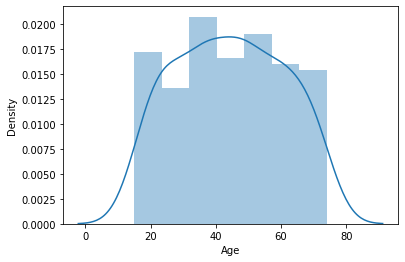

In [4]:
sns.distplot(drugs['Age']) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


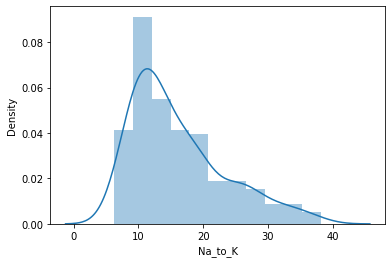

In [5]:
sns.distplot(drugs['Na_to_K'])

In [8]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000




*   Age의 min은 15, max는 74
*   Na_to_K의 min은 6.26, max는 38.24

→ min과 max에 따라 그룹화 해주기



Age groups

•Under 30s

•30-40

•40-50

•50-60

•Over 60s


In [9]:
age_groups = []
for i in drugs['Age']:
    if i <= 30:
        age_groups.append('0-30') #append(): 선택된 요소의 마지막에 새로운 요소를 추가함.
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')
        
drugs['AgeGroup'] = age_groups

Na_to_K groups

•5-10

•10-15

•15-20

•20-25

•25-30

•30+

In [10]:
na_to_k_groups = []
for i in drugs['Na_to_K']:
    if i <= 10:
        na_to_k_groups.append('5-10')
    if i > 10 and i <= 15:
        na_to_k_groups.append('10-15')
    if i > 15 and i <= 20:
        na_to_k_groups.append('15-20')
    if i > 20 and i <= 25:
        na_to_k_groups.append('20-25')
    if i > 25 and i <= 30:
        na_to_k_groups.append('25-30')
    if i > 30:
        na_to_k_groups.append('30+')
        
drugs['Na_to_K_groups'] = na_to_k_groups

In [11]:
drugs = drugs[['AgeGroup', 'Sex', 'BP', 'Cholesterol', 'Na_to_K_groups', 'Drug']] #age 대신에 agegroup, Na_to_K 대신에 Na_to_K_groups 이용
drugs.head()

,AgeGroup,Sex,BP,Cholesterol,Na_to_K_groups,Drug
0,0-30,F,HIGH,HIGH,25-30,DrugY
1,40-50,M,LOW,HIGH,10-15,drugC
2,40-50,M,LOW,HIGH,10-15,drugC
3,0-30,F,NORMAL,HIGH,5-10,drugX
4,60+,F,LOW,HIGH,15-20,DrugY


→ 수치형 변수인 Age와 Na_to_K를 범주형으로 바꿈 



---

**Visualising the  variable distributions**



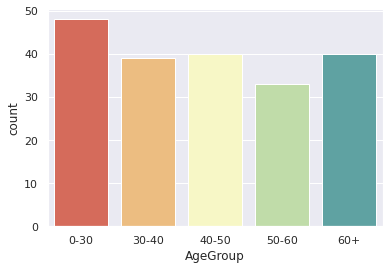

In [12]:
sns.set_theme(style="darkgrid") #set()은 그래프의 스타일을 고정
sns.countplot(x="AgeGroup", data=drugs, palette='Spectral', order=['0-30', '30-40', '40-50', '50-60', '60+']) #countplot은 클래스별 빈도수 확인할 때 사용

* [0-30] 클래스에 인원이 가장 많고 [50-60] 클래스에 인원이 가장 적음. 
* 차이는 대략 20명 미만임 

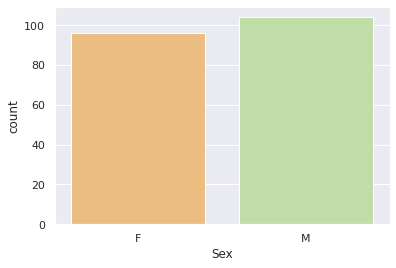

In [13]:
sns.countplot(x="Sex", data=drugs, palette='Spectral')

* 여성과 남성의 인원 수 차이가 크지 않음.
* 그러나 남성이 여성보다 대략 10명 정도 많음.

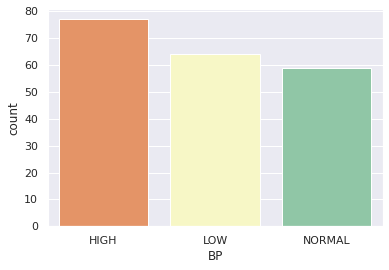

In [14]:
sns.countplot(x="BP", data=drugs, palette='Spectral')

* 환자의 혈압 중 '높음'이 가장 빈도수가 높았음.
* '정상' 혈압 빈도가 가장 낮았음.

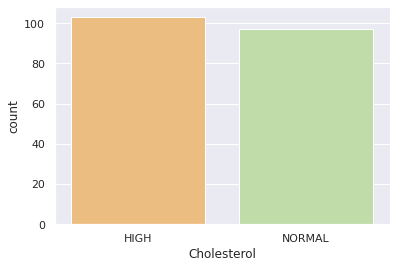

In [15]:
sns.countplot(x="Cholesterol", data=drugs, palette='Spectral')

* 환자의 콜레스트롤이 '정상'인 경우보다 '높음'의 빈도수가 조금 더 높음 

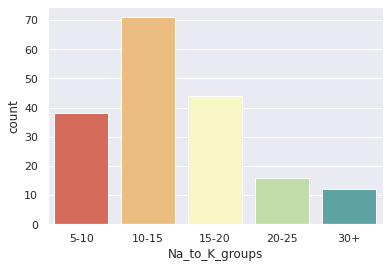

In [16]:
sns.countplot(x="Na_to_K_groups", data=drugs, palette='Spectral', order=['5-10', '10-15', '15-20', '20-25', '30+'])

* 나트륨 대 칼륨의 비율이 [10-15]인 빈도가 가장 높았고, [15-20]와 [5-10] 클래스가 뒤를 이음. 
* 나트륨 대 칼륨의 비율이 [30+]인 빈도가 가장 낮았음.


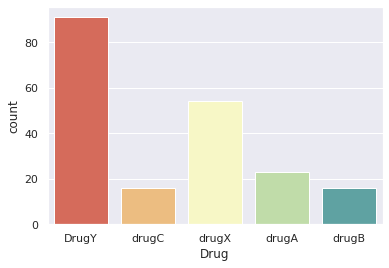

In [17]:
sns.countplot(x="Drug", data=drugs, palette='Spectral')

* 환자에게 처방한 약물의 종류 중에서 [DrugY]의 빈도가 압도적으로 많았음.
* 다음으로 환자에게 많이 처방한 약물은 [drugX]임.
* [drugC], [drugA], [drugB]는 비슷한 빈도로 환자에게 처방함.

약물의 데이터가 비대칭적이기 때문에 SMOTE을 사용하여 drugC, drugX, drugA, drugB를 drugY에 맞게 oversampling 할 것임. 

In [18]:
x, y = drugs.values[:, :-1], drugs.values[:, -1] #x는 drug 변수를 제외한 나머지 변수들 #y는 drug 변수

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33) #train_test_split()을 이용하여 train, test set 나눠주기

In [20]:
#x가 전부 다 범주형이기 때문에 dummy variable로 만들어서 수치형으로 만들어줘야함.
x_train = pd.get_dummies(pd.DataFrame(x_train)) #get_dummies(): 범주형을 수치형으로 변환
x_test = pd.get_dummies(pd.DataFrame(x_test))

In [21]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train) #SMOTE 적용하여 자료의 비율을 같게 만듦

[Text(0.5, 0, 'Drug')]

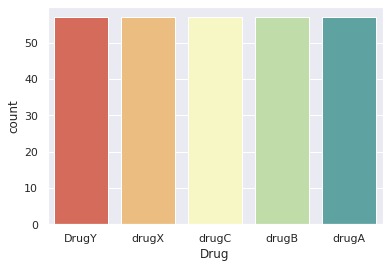

In [22]:
ax = sns.countplot(x=y_train, data=drugs, palette='Spectral')
ax.set(xlabel="Drug")

→  불균형 자료 문제 해결

In [23]:
print("ORIGINAL dataset:", len(drugs), "\n EXTENDED dataset:",len(y))

ORIGINAL dataset: 200 
 EXTENDED dataset: 200


**Logistic Regression**

In [24]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test) #.score()를 이용하여 모델 성능 평가
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 ['DrugY' 'drugC' 'DrugY' 'DrugY' 'drugB' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'drugC' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugB' 'drugX' 'drugX' 'DrugY' 'drugB'
 'drugX' 'drugB' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugA' 'DrugY'
 'drugA' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugB' 'DrugY' 'drugC' 'drugC' 'DrugY' 'drugB' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY'] 
 Accuracy: 100.0 %


**Gaussian Naive Bayes**

In [25]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 ['DrugY' 'drugC' 'DrugY' 'DrugY' 'drugB' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'drugC' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugB' 'drugX' 'drugX' 'DrugY' 'drugB'
 'drugX' 'drugB' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugA' 'DrugY'
 'drugA' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugB' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY'] 
 Accuracy: 96.96969696969697 %


**K-Nearest Neighbours**

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 ['drugA' 'drugC' 'drugA' 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugC' 'DrugY'
 'drugX' 'DrugY' 'drugX' 'drugX' 'drugC' 'DrugY' 'DrugY' 'drugC' 'drugX'
 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugB' 'drugX' 'drugX' 'DrugY' 'drugA'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'drugC' 'drugB' 'DrugY' 'drugC' 'drugX' 'DrugY' 'drugA' 'DrugY'
 'drugA' 'drugC' 'DrugY' 'drugX' 'drugX' 'drugX' 'drugC' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugC' 'drugX' 'DrugY' 'drugA' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY'] 
 Accuracy: 75.75757575757575 %


**Support Vector Machine**

In [27]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_acc = 100*svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test), '\n Accuracy:', svm_acc, '%')

SVM Predictions: 
 ['DrugY' 'drugC' 'DrugY' 'DrugY' 'drugB' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'drugX' 'drugC' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugB' 'drugX' 'drugX' 'DrugY' 'drugB'
 'drugX' 'drugB' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugA' 'DrugY'
 'drugA' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugB' 'DrugY' 'drugC' 'drugC' 'DrugY' 'drugB' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugX' 'DrugY'] 
 Accuracy: 100.0 %


**Summary**

In [28]:
pd.DataFrame(data={'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'K-Nearest Neighbours', 'Support Vector Machine (SVM)'], 'Accuracy %': [log_reg_acc, nb_acc, knn_acc, svm_acc]})

,Model,Accuracy %
0,Logistic Regression,100.000000
1,Gaussian Naive Bayes,96.969697
2,K-Nearest Neighbours,75.757576
3,Support Vector Machine (SVM),100.000000


→ Logistic Regression과 SVM 모델이 높은 성능 